<a href="https://colab.research.google.com/github/peiyulin0520/KPMG-virtual-intern-tasks/blob/main/Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#upload data
from google.colab import files
uploaded = files.upload()

Saving KPMG_VI_New_raw_data_update_final.xlsx to KPMG_VI_New_raw_data_update_final.xlsx


In [3]:
#load data
Transactions = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name =1, header = 1)
NewCustomerList = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name =2, header = 1)
CustomerDemographic = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name =3, header = 1)
CustomerAddress = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name =4, header = 1)

<ipython-input-3-c1b227bbac12>:3: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  NewCustomerList = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name =2, header = 1)
<ipython-input-3-c1b227bbac12>:4: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  CustomerDemographic = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name =3, header = 1)


In [4]:
#Get an overview of each data set - Transactions
Transactions.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [5]:
#get data type and check missing values for Transactions dataset
Transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [6]:
#change data type and check the overview again
Transactions['transaction_id'] = Transactions['transaction_id'].astype(str)
Transactions['product_id'] = Transactions['product_id'].astype(str)
Transactions['customer_id'] = Transactions['customer_id'].astype(str)
#Transactions.loc[Transactions['online_order']== 1.0, 'online_order'] = True
#Transactions.loc[Transactions['online_order']== 0.0, 'online_order'] = False
#pd.DataFrame({'col': [True]}).bool()
Transactions1 = Transactions 
Transactions1 = Transactions1.dropna(subset=['online_order'])
Transactions1['online_order'] = Transactions1['online_order'].replace([1.0, 0.0], [True, False])

#Below query works well when there is not missing value in the column. Oherwise, the missing value would become True in default
#Transactions['online_order'] = Transactions['online_order'].astype('bool')
Transactions1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19640 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           19640 non-null  object        
 1   product_id               19640 non-null  object        
 2   customer_id              19640 non-null  object        
 3   transaction_date         19640 non-null  datetime64[ns]
 4   online_order             19640 non-null  bool          
 5   order_status             19640 non-null  object        
 6   brand                    19445 non-null  object        
 7   product_line             19445 non-null  object        
 8   product_class            19445 non-null  object        
 9   product_size             19445 non-null  object        
 10  list_price               19640 non-null  float64       
 11  standard_cost            19445 non-null  float64       
 12  product_first_sold_date  19445 n

<ipython-input-6-02e09b63753d>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Transactions1['online_order'] = Transactions1['online_order'].replace([1.0, 0.0], [True, False])


In [7]:
# a example of extracting rows that contain missing values in any column
df = {'A':[1,2,3,4,5], 'B':[True, False,np.nan, np.nan, np.nan]}
df = pd.DataFrame(df)
print(df)
df[df.isna().any(axis=1)]

   A      B
0  1   True
1  2  False
2  3    NaN
3  4    NaN
4  5    NaN


,A,B
2,3,NaN
3,4,NaN
4,5,NaN


In [8]:
miss_df = Transactions1[Transactions1.isna().any(axis=1)]

In [9]:
print('product_id', len(miss_df['product_id'].unique()))
print('customer_id',len(miss_df['customer_id'].unique()))
print('transaction_date',len(miss_df['transaction_date'].unique()))
print('online_order',len(miss_df['online_order'].unique()))
print('order_status',len(miss_df['order_status'].unique()))

product_id 1
customer_id 190
transaction_date 152
online_order 2
order_status 2


In [10]:
miss_df['product_id'].unique()

array(['0'], dtype=object)

In [11]:
#get the data without any missing values
no_miss_df = Transactions1.dropna(how='any')
#check whether '0' appear inside
is_0_in_product_id = '0' in no_miss_df['product_id'].values
print(is_0_in_product_id)
#check how many product_id is 0
print((no_miss_df['product_id']=='0').sum())
print(len(miss_df))
# make Transactions1 to be the smae as no_miss_df
Transactions1 = no_miss_df

True
1157
195


Based on the Transactions dataset overview, transaction_id is not useful for further analysis. The customer_id is a primary key  to further join other data sets, so I keep it in the dataset. Also, brand, product_line, product_class, product_size, standard_cost, and product_first_date lost the same amount of data. Diving into deeper, they are all belong to product_id = 0. I decide to remove those rows containing missing values because of two reasons. First, the proportion of the missing values is less than 1%. Second, for product_id 0, the missing data is around 14% (moderate size). If I fill in data with mode or mean of data belonging to product_id 0, it might have a noticable impact on analysis, affect the model result, and the make incorrect recommendations.

In [68]:
# create the profit column by subtracting the list price with standard cost
Transactions1['profit'] = Transactions1['list_price'] - Transactions1['standard_cost']

In [12]:
CustomerDemographic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  default     

In [13]:
CustomerDemographic.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [14]:
print(CustomerDemographic['deceased_indicator'].unique())
print(CustomerDemographic['owns_car'].unique())

['N' 'Y']
['Yes' 'No']


In [235]:
# check duplication
CustomerDemographic.duplicated('customer_id').sum()

0

In [15]:
#change the data type 
CustomerDemographic1 = CustomerDemographic
CustomerDemographic1['customer_id'] = CustomerDemographic1['customer_id'].astype(str)
CustomerDemographic1['deceased_indicator'] = CustomerDemographic1['deceased_indicator'].replace(['N', 'Y'], [False, True])
CustomerDemographic1['owns_car'] = CustomerDemographic1['owns_car'].replace(['Yes', 'No'], [True, False])
CustomerDemographic1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   object        
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   bool          
 10  default     

Based on the overview of the dataset, we can find that there are missing values in last_name, DOB, job_title, job_industry_category, default, and tenure. the last name is not a completed data, but it won't affect the analysis since we have the customer_id to tell who the customer is and it's not a necessary feature for data analysis. From DOB data, we can gain the age of the customer. For job_title and job_industry_category data, I would like to dove deeper to observe the reason. The default data doesn't contain any meaningful information, so I would like to remove the feature. Tenure could be a feature for data analysis, and the number of misssing values is 87 out of 4,000. I would observe the data distribution and decide how to handle the missing values.

In [132]:
# observe the value in gender variable
print(CustomerDemographic1['gender'].unique())

['F' 'Male' 'Female' 'U' 'Femal' 'M']


In [133]:
# change the value in the gender column to make it in an uniform format
CustomerDemographic1['gender'].replace(['Male', 'Female', 'Femal'], ['M', 'F', 'F'], inplace=True)

In [16]:
#use the datetime package and check the datetime now
from datetime import datetime
now = datetime.now()
print(now)

2023-06-01 10:46:09.006718


In [17]:
#calculate the age by DOB
CustomerDemographic1['Age'] = (now - CustomerDemographic1['DOB']).astype('<m8[Y]')
#check the dataset
CustomerDemographic1.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure,Age
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,False,"""'",True,11.0,69.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,False,<script>alert('hi')</script>,True,16.0,42.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,False,2018-02-01 00:00:00,True,15.0,69.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,False,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,False,7.0,61.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,False,NIL,True,8.0,46.0


In [18]:
# get the number of job_industry_category and job_title
print(len(CustomerDemographic1['job_industry_category'].unique()))
print(len(CustomerDemographic1['job_title'].unique()))

10
196


In [19]:
print(CustomerDemographic1['job_industry_category'].unique())

['Health' 'Financial Services' 'Property' 'IT' nan 'Retail' 'Argiculture'
 'Manufacturing' 'Telecommunications' 'Entertainment']


Based on the information, we can see that the number of job industry category is 10, including NaN. We can conclude that the number of category is not much for customers to choose, so that can cause the NaN appear in the dataset. For the job title, it almost reaches 200 types of title.

In [134]:
#check how many data is missed in either job_title or job_industry_category
demo_miss_job_df = CustomerDemographic1[CustomerDemographic1[['job_industry_category', 'job_title']].isna().any(axis=1)]
demo_miss_job_category_df = CustomerDemographic1[CustomerDemographic1[['job_industry_category']].isna().any(axis=1)]
demo_miss_job_title_df = CustomerDemographic1[CustomerDemographic1[['job_title']].isna().any(axis=1)]

In [135]:
# get the number of the missed rows
print(len(demo_miss_job_df))
#1057 out of 4000 is quite a lots 
print(len(demo_miss_job_category_df))
print(len(demo_miss_job_title_df))

0
0
0


Based on the information, there are 1057 rows lost in either of the feature. Deleting the data would lost other information, and the job title and industry might be useful for analysis. Thus, changing the NaN value to Unknown category.

In [22]:
# fill NaN data with Others
CustomerDemographic1['job_industry_category'] = CustomerDemographic1['job_industry_category'].fillna('Unknown')
CustomerDemographic1['job_title'] = CustomerDemographic1['job_title'].fillna('Unknown')

In [23]:
CustomerAddress.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [24]:
CustomerAddress.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


In [236]:
# check duplication
CustomerAddress.duplicated('customer_id').sum()

0

In [25]:
#change the data type
CustomerAddress1 = CustomerAddress
CustomerAddress1['customer_id'] = CustomerAddress1['customer_id'].astype(str)
CustomerAddress1['postcode'] = CustomerAddress1['postcode'].astype(str)
CustomerAddress1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   object
 1   address             3999 non-null   object
 2   postcode            3999 non-null   object
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 187.6+ KB


In [26]:
#check the gender, state and country use the uniform representation
print(CustomerAddress1['country'].unique())
print(CustomerAddress1['state'].unique())

['Australia']
['New South Wales' 'QLD' 'VIC' 'NSW' 'Victoria']


New South Wales and NSW should use the same representation.
Victoria and Vic should use the same representation as well.

In [27]:
# modify the category value to make it in a uniform representation
CustomerAddress1['state'] = CustomerAddress1['state'].replace(['New South Wales', 'Victoria'], ['NSW', 'VIC'])
# check again to ensure the change is taken place
print(CustomerAddress1['state'].unique())

['NSW' 'QLD' 'VIC']


The next step is to combine three datasets by using merge()

In [28]:
print(CustomerAddress1.columns)
print(CustomerDemographic1.columns)
print(Transactions.columns)

Index(['customer_id', 'address', 'postcode', 'state', 'country',
       'property_valuation'],
      dtype='object')
Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'default', 'owns_car', 'tenure', 'Age'],
      dtype='object')
Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date'],
      dtype='object')


In [136]:
customer_info = pd.merge(CustomerAddress1, CustomerDemographic1, how='outer', on='customer_id')
tran_cust = pd.merge(customer_info, Transactions1, how='right', on='customer_id')

In [137]:
tran_cust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19445 entries, 0 to 19444
Data columns (total 32 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          19445 non-null  object        
 1   address                              19416 non-null  object        
 2   postcode                             19416 non-null  object        
 3   state                                19416 non-null  object        
 4   country                              19416 non-null  object        
 5   property_valuation                   19416 non-null  float64       
 6   first_name                           19442 non-null  object        
 7   last_name                            18816 non-null  object        
 8   gender                               19442 non-null  object        
 9   past_3_years_bike_related_purchases  19442 non-null  float64       
 10  DOB       

In [138]:
tran_cust.head()

,customer_id,address,postcode,state,country,property_valuation,first_name,last_name,gender,past_3_years_bike_related_purchases,...,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,profit
0,2950,984 Hoepker Court,3064,VIC,Australia,6.0,Kristos,Anthony,M,19.0,...,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,17.87
1,3120,4 Shopko Circle,2196,NSW,Australia,5.0,Lauree,O'Donnell,F,89.0,...,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,1702.55
2,402,586 Miller Parkway,2835,NSW,Australia,1.0,Berne,Donegan,M,9.0,...,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0,1544.61
3,3135,1617 Harper Parkway,2096,NSW,Australia,10.0,Titus,Worsall,M,83.0,...,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0,817.36
4,787,0601 Stephen Place,2292,NSW,Australia,7.0,Norma,Batrim,F,29.0,...,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0,1055.82


After merging three datasets, there are some missing values in columns that not belong to Transactions1 dataset. From the dataset information, we can easily notice that there are three customer_id that shown in Transaction dataset doesn't record in the CustomerDemographic.

In [139]:
tran_cust.drop(columns=['default'], inplace=True)

In [140]:
tran_cust[tran_cust[['gender']].isna().any(axis=1)]

,customer_id,address,postcode,state,country,property_valuation,first_name,last_name,gender,past_3_years_bike_related_purchases,...,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,profit
8478,5034,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,Approved,Solex,Road,medium,medium,416.98,312.735016,42218.0,104.244984
16232,5034,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,Approved,Norco Bicycles,Standard,medium,medium,360.40,270.299988,35667.0,90.100012
16977,5034,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,Approved,OHM Cycles,Road,medium,medium,742.54,667.400024,33879.0,75.139976


In [141]:
tran_cust['customer_id'].astype(int).sort_values().unique()

array([   1,    2,    3, ..., 3499, 3500, 5034])

It is impossible to have customer_id 5034 in transactions dataset. It must be mistyped. However, we don't know who purchased the product, so the best way is to remove the records.

In [272]:
tran_cust1 = tran_cust.dropna(subset=['gender'])

In [273]:
tran_cust1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19442 entries, 0 to 19444
Data columns (total 31 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          19442 non-null  object        
 1   address                              19416 non-null  object        
 2   postcode                             19416 non-null  object        
 3   state                                19416 non-null  object        
 4   country                              19416 non-null  object        
 5   property_valuation                   19416 non-null  float64       
 6   first_name                           19442 non-null  object        
 7   last_name                            18816 non-null  object        
 8   gender                               19442 non-null  object        
 9   past_3_years_bike_related_purchases  19442 non-null  float64       
 10  DOB       

In [274]:
#import required packages
import matplotlib.pyplot as plt
import seaborn as sns

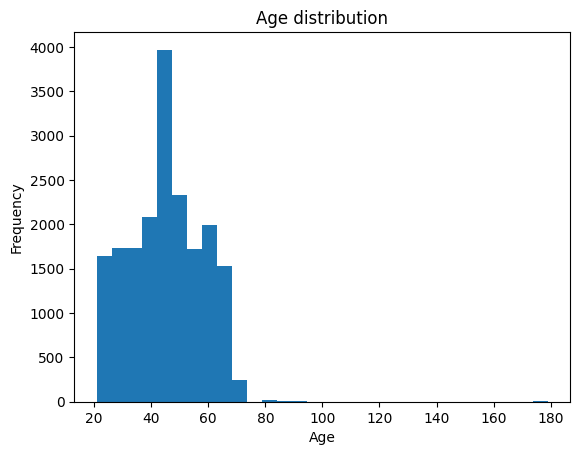

In [275]:
#observe the age distribution to decide how to handle the missing values.
plt.hist(tran_cust1['Age'], bins=30)
plt.title('Age distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

From the plot, it is rare that people aged over 80. Therefore, I decide to fill the na value with mean. However, I would not include age over 80 in my calculation.

In [276]:
# get the mean value, excluding age over 80
x = tran_cust1[tran_cust1['Age']< 80] 
mean_age = round(x['Age'].mean())
#fill na data with mean 
tran_cust1['Age'].fillna(mean_age, inplace=True)
# change data type of age to integer
tran_cust1['Age'].astype(int)


<ipython-input-276-621c8b418c0a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tran_cust1['Age'].fillna(mean_age, inplace=True)


0        68
1        44
2        45
3        61
4        26
         ..
19440    28
19441    48
19442    49
19443    68
19444    26
Name: Age, Length: 19442, dtype: int64

In [277]:
tran_cust1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19442 entries, 0 to 19444
Data columns (total 31 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          19442 non-null  object        
 1   address                              19416 non-null  object        
 2   postcode                             19416 non-null  object        
 3   state                                19416 non-null  object        
 4   country                              19416 non-null  object        
 5   property_valuation                   19416 non-null  float64       
 6   first_name                           19442 non-null  object        
 7   last_name                            18816 non-null  object        
 8   gender                               19442 non-null  object        
 9   past_3_years_bike_related_purchases  19442 non-null  float64       
 10  DOB       

In [278]:
print(tran_cust1['state'].value_counts())
x= tran_cust1[tran_cust1[['state']].isna().any(axis=1)]
print(str(len(x)) +' of rows are missing data')

NSW    10364
VIC     4908
QLD     4144
Name: state, dtype: int64
26 of rows are missing data


In [279]:
tran_cust1['country'].unique()

array(['Australia', nan], dtype=object)

In the dataset, the country data is all Australia. Therefore, it is useless to make it as a feature in the model. For the state data, there are three states overall. I remove the rows that contain missing values in state column because the number of missing data is 26, too small to affect the result.

In [280]:
# remove country feature
tran_cust1.drop(columns=['country'], inplace=True)
tran_cust1.dropna(subset=['state'], inplace=True)

<ipython-input-280-2dc3b10c46c6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tran_cust1.drop(columns=['country'], inplace=True)
<ipython-input-280-2dc3b10c46c6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tran_cust1.dropna(subset=['state'], inplace=True)


In [281]:
tran_cust1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19416 entries, 0 to 19444
Data columns (total 30 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          19416 non-null  object        
 1   address                              19416 non-null  object        
 2   postcode                             19416 non-null  object        
 3   state                                19416 non-null  object        
 4   property_valuation                   19416 non-null  float64       
 5   first_name                           19416 non-null  object        
 6   last_name                            18790 non-null  object        
 7   gender                               19416 non-null  object        
 8   past_3_years_bike_related_purchases  19416 non-null  float64       
 9   DOB                                  18986 non-null  datetime64[ns]
 10  job_title 

In [282]:
# check how many unique postcode in the data
len(tran_cust1['postcode'].unique())

835

In [283]:
x= tran_cust1[tran_cust1[['tenure']].isna().any(axis=1)]
x['job_title'].unique()
len(x)
# 430 rows of tenure is na
# Assumption: customers who don't fill their tenure is because the tenure for the job title is 0

# fill na in tenure with 0
tran_cust1['tenure'].fillna(0, inplace=True)

<ipython-input-283-1eaf4f854403>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tran_cust1['tenure'].fillna(0, inplace=True)


In [284]:
tran_cust1['order_status'].value_counts()

Approved     19245
Cancelled      171
Name: order_status, dtype: int64

In [285]:
tran_cust1['online_order'].value_counts()

True     9729
False    9687
Name: online_order, dtype: int64

In [286]:
len(tran_cust1['product_first_sold_date'].unique())

100

In [287]:
# check data duplication
print(tran_cust1.duplicated().sum())
tran_cust1.info()


0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 19416 entries, 0 to 19444
Data columns (total 30 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          19416 non-null  object        
 1   address                              19416 non-null  object        
 2   postcode                             19416 non-null  object        
 3   state                                19416 non-null  object        
 4   property_valuation                   19416 non-null  float64       
 5   first_name                           19416 non-null  object        
 6   last_name                            18790 non-null  object        
 7   gender                               19416 non-null  object        
 8   past_3_years_bike_related_purchases  19416 non-null  float64       
 9   DOB                                  18986 non-null  datetime64[ns]
 10  job_titl

There is no duplicated data

In [253]:
# group by customer_id and sum up the profit
# tran_cust2 = tran_cust1
# tran_cust2['sum_profit']=tran_cust2.groupby('customer_id')['profit'].transform('sum')

<ipython-input-253-7be65c9c4b87>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tran_cust2['sum_profit']=tran_cust2.groupby('customer_id')['profit'].transform('sum')


In [254]:
#check whether each customer only has one sum_profit
# check_df_counts = tran_cust2.groupby('customer_id')['sum_profit'].nunique()
# n_issue_sum_profits = (check_df_counts >1).sum()
# print(n_issue_sum_profits) # confirmed that each customer_id only has one sum_profit
# print(tran_cust2)

0
      customer_id               address postcode state  property_valuation  \
0            2950     984 Hoepker Court     3064   VIC                 6.0   
1            3120       4 Shopko Circle     2196   NSW                 5.0   
2             402    586 Miller Parkway     2835   NSW                 1.0   
3            3135   1617 Harper Parkway     2096   NSW                10.0   
4             787    0601 Stephen Place     2292   NSW                 7.0   
...           ...                   ...      ...   ...                 ...   
19440        1018         3 Hayes Court     3109   VIC                10.0   
19441         127    0 Pearson Crossing     4405   QLD                 1.0   
19442        2284  10055 Old Shore Lane     3630   VIC                 1.0   
19443        2764       1 Wayridge Park     4301   QLD                 1.0   
19444        1144      4439 7th Terrace     2177   NSW                 9.0   

      first_name  last_name gender  past_3_years_bike_related

In [288]:
# remove useless features to build model: postcode, customer_id, first_name, last_name, address, DOB, transaction_id, product_id, transaction_date, online_order, order_status, brand, product_line, product_class, product_size, product_first_sold_date, list_price, standard_cost
tran_cust2 = tran_cust1
tran_cust2 = tran_cust2.drop(columns=['customer_id','postcode', 'job_title', 'first_name', 'last_name', 'address', 'DOB', 'job_title', 'transaction_id', 'product_id', 'transaction_date', 'online_order', 'order_status', 'brand', 'product_line', 'product_class', 'product_size', 'product_first_sold_date', 'list_price', 'standard_cost'])

In [256]:
# check the number of duplication
# print(tran_cust2.duplicated('customer_id').sum())
# print(tran_cust2.duplicated().sum())

# remove the duplicated rows
# tran_cust2 = tran_cust2.drop_duplicates()

#remove customer_id, which is the primary key for data identification 
# tran_cust2 = tran_cust2.drop(columns=['customer_id'])

15929
15929


In [289]:
tran_cust2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19416 entries, 0 to 19444
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   state                                19416 non-null  object 
 1   property_valuation                   19416 non-null  float64
 2   gender                               19416 non-null  object 
 3   past_3_years_bike_related_purchases  19416 non-null  float64
 4   job_industry_category                19416 non-null  object 
 5   wealth_segment                       19416 non-null  object 
 6   deceased_indicator                   19416 non-null  object 
 7   owns_car                             19416 non-null  object 
 8   tenure                               19416 non-null  float64
 9   Age                                  19416 non-null  float64
 10  profit                               19416 non-null  float64
dtypes: float64(5), object(6)
mem

In [290]:
print(tran_cust2['deceased_indicator'].unique())
print(tran_cust2['owns_car'].unique())

[False True]
[True False]


In [291]:
#change boolean to 1 and 0
tran_cust2['owns_car'].replace([True, False], [1,0], inplace=True)
tran_cust2['deceased_indicator'].replace([True, False], [1,0], inplace=True)
convert_variables = ['owns_car', 'deceased_indicator']
tran_cust2[convert_variables] = tran_cust2[convert_variables].astype('uint8')

# one hot encoding
tran_cust3 = pd.get_dummies(data=tran_cust2, columns=['state', 'gender', 'job_industry_category', 'wealth_segment'])

In [292]:
tran_cust3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19416 entries, 0 to 19444
Data columns (total 26 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   property_valuation                        19416 non-null  float64
 1   past_3_years_bike_related_purchases       19416 non-null  float64
 2   deceased_indicator                        19416 non-null  uint8  
 3   owns_car                                  19416 non-null  uint8  
 4   tenure                                    19416 non-null  float64
 5   Age                                       19416 non-null  float64
 6   profit                                    19416 non-null  float64
 7   state_NSW                                 19416 non-null  uint8  
 8   state_QLD                                 19416 non-null  uint8  
 9   state_VIC                                 19416 non-null  uint8  
 10  gender_F                          

In [293]:
# import the required packages for building a logistic regression model
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [294]:
# tran_cust3_data = tran_cust3.drop(columns=['sum_profit'])
# tran_cust3_target = tran_cust3[['sum_profit']]
tran_cust3_data = tran_cust3.drop(columns=['profit'])
tran_cust3_target = tran_cust3[['profit']]

In [295]:
correlation_matrix = tran_cust3_data.corr()
print(correlation_matrix)

                                          property_valuation  \
property_valuation                                  1.000000   
past_3_years_bike_related_purchases                 0.011852   
deceased_indicator                                 -0.032482   
owns_car                                            0.053132   
tenure                                             -0.017514   
Age                                                 0.013623   
state_NSW                                           0.340006   
state_QLD                                          -0.369157   
state_VIC                                          -0.042245   
gender_F                                            0.014334   
gender_M                                           -0.013766   
gender_U                                           -0.001966   
job_industry_category_Argiculture                  -0.008258   
job_industry_category_Entertainment                 0.005577   
job_industry_category_Financial Services

In [296]:
vif = pd.DataFrame()
vif['Features'] = tran_cust3_data.columns
vif['VIF'] = [variance_inflation_factor(tran_cust3_data.values, i) for i in range(tran_cust3_data.shape[1])]
print(vif)

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


                                    Features       VIF
0                         property_valuation  1.208142
1        past_3_years_bike_related_purchases  1.006851
2                         deceased_indicator  1.008298
3                                   owns_car  1.008049
4                                     tenure  1.352439
5                                        Age  1.259162
6                                  state_NSW       inf
7                                  state_QLD       inf
8                                  state_VIC       inf
9                                   gender_F       inf
10                                  gender_M       inf
11                                  gender_U       inf
12         job_industry_category_Argiculture       inf
13       job_industry_category_Entertainment       inf
14  job_industry_category_Financial Services       inf
15              job_industry_category_Health       inf
16                  job_industry_category_IT       inf
17       j

In [297]:
print(tran_cust3_data['gender_F'].sum(), tran_cust3_data['gender_M'].sum(),\
      tran_cust3_data['gender_U'].sum())
print(tran_cust3_data['state_NSW'].sum(), tran_cust3_data['state_QLD'].sum(),\
      tran_cust3_data['state_VIC'].sum())
print(tran_cust3_data['job_industry_category_Argiculture'].sum(),\
      tran_cust3_data['job_industry_category_Entertainment'].sum(),\
      tran_cust3_data['job_industry_category_Financial Services'].sum(),\
      tran_cust3_data['job_industry_category_Health'].sum(),\
      tran_cust3_data['job_industry_category_IT'].sum(),\
      tran_cust3_data['job_industry_category_Manufacturing'].sum(),\
      tran_cust3_data['job_industry_category_Property'].sum(),\
      tran_cust3_data['job_industry_category_Retail'].sum(),\
      tran_cust3_data['job_industry_category_Telecommunications'].sum(),\
      tran_cust3_data['job_industry_category_Unknown'].sum())
print(tran_cust3_data['wealth_segment_Affluent Customer'].sum(),\
      tran_cust3_data['wealth_segment_High Net Worth'].sum(),\
      tran_cust3_data['wealth_segment_Mass Customer'].sum())

9736 9242 438
10364 4144 4908
559 686 3768 3016 1041 3897 1251 1718 351 3129
4716 4955 9745


To avoid multicollinearity issue, I decide to remove one dummy variable in each original set based on the sum of the binary values or the column that contains the least information (eg. Unknown data) in dummy variables.
Based on the above information, I would remove 'gender_U' in gender, 'state_QLD' in state, 'job_industry_category_Unknown' in the job_industry_category, and 'wealth_segment_Affluent Customer' is wealth segment.

In [298]:
tran_cust3_data.drop(columns=['gender_U', 'state_QLD', 'job_industry_category_Unknown', 'wealth_segment_Affluent Customer'], inplace=True)

In [299]:
vif = pd.DataFrame()
vif['Features'] = tran_cust3_data.columns
vif['VIF'] = [variance_inflation_factor(tran_cust3_data.values, i) \
              for i in range(tran_cust3_data.shape[1])]
print(vif)

                                    Features        VIF
0                         property_valuation   9.329974
1        past_3_years_bike_related_purchases   3.832605
2                         deceased_indicator   1.008713
3                                   owns_car   2.011621
4                                     tenure   5.485575
5                                        Age  14.134992
6                                  state_NSW   4.179093
7                                  state_VIC   2.301940
8                                   gender_F  12.267647
9                                   gender_M  11.642432
10         job_industry_category_Argiculture   1.170487
11       job_industry_category_Entertainment   1.207243
12  job_industry_category_Financial Services   2.102340
13              job_industry_category_Health   1.904985
14                  job_industry_category_IT   1.314471
15       job_industry_category_Manufacturing   2.150790
16            job_industry_category_Property   1

In [313]:
# create function for stratified sampling
def stratified_sample(df, strata, size=None, seed=None, keep_index= True):
    '''
    It samples data from a pandas dataframe using strata. These functions use
    proportionate stratification:
    n1 = (N1/N) * n
    where:
        - n1 is the sample size of stratum 1
        - N1 is the population size of stratum 1
        - N is the total population size
        - n is the sampling size
    Parameters
    ----------
    :df: pandas dataframe from which data will be sampled.
    :strata: list containing columns that will be used in the stratified sampling.
    :size: sampling size. If not informed, a sampling size will be calculated
        using Cochran adjusted sampling formula:
        cochran_n = (Z**2 * p * q) /e**2
        where:
            - Z is the z-value. In this case we use 1.96 representing 95%
            - p is the estimated proportion of the population which has an
                attribute. In this case we use 0.5
            - q is 1-p
            - e is the margin of error
        This formula is adjusted as follows:
        adjusted_cochran = cochran_n / 1+((cochran_n -1)/N)
        where:
            - cochran_n = result of the previous formula
            - N is the population size
    :seed: sampling seed
    :keep_index: if True, it keeps a column with the original population index indicator
    
    Returns
    -------
    A sampled pandas dataframe based in a set of strata.
    Examples
    --------
    >> df.head()
    	id  sex age city 
    0	123 M   20  XYZ
    1	456 M   25  XYZ
    2	789 M   21  YZX
    3	987 F   40  ZXY
    4	654 M   45  ZXY
    ...
    # This returns a sample stratified by sex and city containing 30% of the size of
    # the original data
    >> stratified = stratified_sample(df=df, strata=['sex', 'city'], size=0.3)
    Requirements
    ------------
    - pandas
    - numpy
    '''
    population = len(df)
    size = __smpl_size(population, size)
    tmp = df[strata]
    tmp['size'] = 1
    tmp_grpd = tmp.groupby(strata).count().reset_index()
    tmp_grpd['samp_size'] = round(size/population * tmp_grpd['size']).astype(int)

    # controlling variable to create the dataframe or append to it
    first = True 
    for i in range(len(tmp_grpd)):
        # query generator for each iteration
        qry=''
        for s in range(len(strata)):
            stratum = strata[s]
            value = tmp_grpd.iloc[i][stratum]
            n = tmp_grpd.iloc[i]['samp_size']

            if type(value) == str:
                value = "'" + str(value) + "'"
            
            if s != len(strata)-1:
                qry = qry + stratum + ' == ' + str(value) +' & '
            else:
                qry = qry + stratum + ' == ' + str(value)
        
        # final dataframe
        if first:
            stratified_df = df.query(qry).sample(n=n, random_state=seed).reset_index(drop=(not keep_index))
            first = False
        else:
            tmp_df = df.query(qry).sample(n=n, random_state=seed).reset_index(drop=(not keep_index))
            stratified_df = stratified_df.append(tmp_df, ignore_index=True)
    
    return stratified_df


def stratified_sample_report(df, strata, size=None):
    '''
    Generates a dataframe reporting the counts in each stratum and the counts
    for the final sampled dataframe.
    Parameters
    ----------
    :df: pandas dataframe from which data will be sampled.
    :strata: list containing columns that will be used in the stratified sampling.
    :size: sampling size. If not informed, a sampling size will be calculated
        using Cochran adjusted sampling formula:
        cochran_n = (Z**2 * p * q) /e**2
        where:
            - Z is the z-value. In this case we use 1.96 representing 95%
            - p is the estimated proportion of the population which has an
                attribute. In this case we use 0.5
            - q is 1-p
            - e is the margin of error
        This formula is adjusted as follows:
        adjusted_cochran = cochran_n / 1+((cochran_n -1)/N)
        where:
            - cochran_n = result of the previous formula
            - N is the population size
    Returns
    -------
    A dataframe reporting the counts in each stratum and the counts
    for the final sampled dataframe.
    '''
    population = len(df)
    size = __smpl_size(population, size)
    tmp = df[strata]
    tmp['size'] = 1
    tmp_grpd = tmp.groupby(strata).count().reset_index()
    tmp_grpd['samp_size'] = round(size/population * tmp_grpd['size']).astype(int)
    return tmp_grpd

In [322]:
# view the stratified report first
# sample_size = 0.8*len(tran_cust3)
# print(round(sample_size))
# stratified_sample_report(tran_cust3, ['deceased_indicator', 'owns_car', 'state_NSW',\
#                                       'state_VIC', 'gender_F', 'gender_M','job_industry_category_Argiculture',\
#                                       'job_industry_category_Entertainment',\
#                                       'job_industry_category_Financial Services',\
#                                       'job_industry_category_Health',\
#                                       'job_industry_category_IT',\
#                                       'job_industry_category_Manufacturing',\
#                                       'job_industry_category_Property',\
#                                       'job_industry_category_Retail',\
#                                       'job_industry_category_Telecommunications',\
#                                       'wealth_segment_High Net Worth',\
#                                       'wealth_segment_Mass Customer'],\
#                          sample_size)

# stratified_sample(tran_cust3, ['deceased_indicator', 'owns_car', 'state_NSW', 'state_VIC'], size=15533, seed=123, keep_index= True)

In [300]:
import statsmodels.api as sm
# from sklearn.metrics import mean_squared_error
# x_train, x_test, y_train, y_test = train_test_split(tran_cust3_data, tran_cust2_target, test_size = 0.2, random_state=42)
# regression_model = LinearRegression()
# coefficients = results.params
# y_pred = regression_model.predict(x_test)
# mse = mean_squared_error(y_test, y_pred)
# print('Mean squared error: ', mse)
X = sm.add_constant(tran_cust3_data)
model = sm.OLS(tran_cust3_target, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 profit   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.454
Date:                Thu, 01 Jun 2023   Prob (F-statistic):             0.0821
Time:                        19:01:42   Log-Likelihood:            -1.4793e+05
No. Observations:               19416   AIC:                         2.959e+05
Df Residuals:                   19394   BIC:                         2.961e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [305]:
data1 = tran_cust3_data[['property_valuation', 'past_3_years_bike_related_purchases','deceased_indicator', 'owns_car', 'tenure', 'Age']]
X_data1 = sm.add_constant(data1)
model_data1 = sm.OLS(tran_cust3_target, X_data1)
results_data1 = model_data1.fit()
print(results_data1.summary())

                            OLS Regression Results                            
Dep. Variable:                 profit   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     2.600
Date:                Thu, 01 Jun 2023   Prob (F-statistic):             0.0161
Time:                        19:06:34   Log-Likelihood:            -1.4794e+05
No. Observations:               19416   AIC:                         2.959e+05
Df Residuals:                   19409   BIC:                         2.960e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

In [301]:
state_data = tran_cust3_data[['state_NSW', 'state_VIC']]
X_state = sm.add_constant(state_data)
model_state = sm.OLS(tran_cust3_target, X_state)
results_state = model_state.fit()
print(results_state.summary())

                            OLS Regression Results                            
Dep. Variable:                 profit   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.5495
Date:                Thu, 01 Jun 2023   Prob (F-statistic):              0.577
Time:                        19:02:27   Log-Likelihood:            -1.4795e+05
No. Observations:               19416   AIC:                         2.959e+05
Df Residuals:                   19413   BIC:                         2.959e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        553.4808      7.663     72.230      0.0